# Numerical Linear Regression

## Steps

1. Gradient descent with one variable
2. Newton method with one variable
3. Gradient descent with two (and more) variables
4.  Newton method with two (and more) variables

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator


## Gradient descent with one variable 

Let us start a simple linear model $Y = aX$ with one feature $X$ and one response $Y$, a slope of $a$ that is to be learned assuming an intercept $b=0$.

We generate data for $Y=2X, X\in [1,10]$ with a random error that is normally distributed proportional to $\mathcal{N}(0,10)$. 

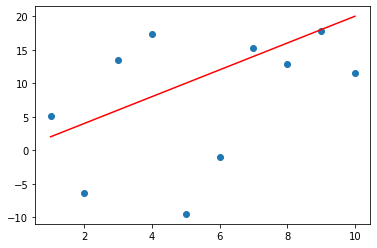

In [2]:
random_generator = np.random.default_rng(42)
#rng(1);

N = 10;
a0 = 2;
X = np.arange(1,N+1)
Y = a0*X + N*random_generator.standard_normal(X.shape)
plt.scatter(X,Y)
plt.plot(X,a0*X,'r')
plt.show()

We learn $\hat a$ from the data and expect it to be $\approx 2$. Therefore, we minimize the residual sum of squares as our loss function, i.e., $\hat a = \min \arg RSS(a)$ where $RSS(a) =\sum_{i=1}^{n}(y_i - a x_i)^2$.  

For the sake of demonstrating the numerical approach, we deliberately ignore that an analytic solution exists. 

Let's define and plot $RSS$ as a function of $a$. We chose the range of $a$ around the (actually unknown) minimum of $\approx 2$. 

In [3]:



# @f
# residual sum of squares at a point.
# a is scalar and is the coefficient of X, X is vector of x values, Y is vector of corresponding y values, returns scalar
def rss_point(a, X, Y):
    return np.sum( (Y-(a*X))**2)

# residual sum of squares over an interval- which looks like a parabola
# a_range is an array of x coefficients is scalar, X is vector of x values, Y is vector of corresponding y values, returns an array of y values
def rss_range(a_range, X, Y):
    return np.array([rss_point(a_r,X,Y) for a_r in a_range])


# derivative of residual sum of squares at a point
# a is scalar and is the coefficient of X, X is vector of x values, Y is vector of corresponding y values, returns an array of y values
# ff
def grad_rss_point(a, X, Y):
    return -2*np.sum((Y - a*X)*X);

# derivative of residual sum of squares over an interval, this is a line with a consistent slope
#def grad_rss_range(a_range, X, Y):
#    return np.array([grad_rss_point(a_r,X,Y) for a_r in a_range])

# fff = @(a)((a-a0)*ff(a0)+f(a0));
# derivative of residual sum of squares of a point, extended around the point to show the slope
def grad_rss_slope(a_range, a0, X, Y):
    return np.array( [   (a_r-a0)*grad_rss_point(a0,X,Y) for a_r in a_range]) + rss_point(a0, X, Y)

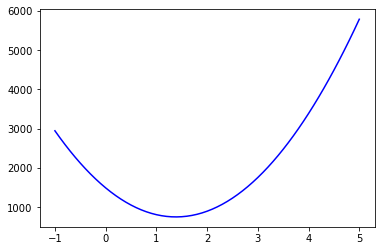

In [4]:
a_range = np.linspace(a0-3,a0+3,61)
plt.plot(a_range,rss_range(a_range, X, Y),'b')
plt.show()

The gradient of $RSS(a)$ for any $a$ is defiend as:

$$
\begin{aligned}
\nabla RSS(a) &= \frac{\partial RSS(a)}{\partial a}\\
&=\frac{\partial \sum_{i=1}^{n}(y_i- a x_i)^2}{\partial a}\\
&=\sum_{i=1}^{n}2(y_i- a x_i)(-x_i)\\
&=-2\sum_{i=1}^{n}(y_i- a x_i)x_i
\end{aligned}
$$

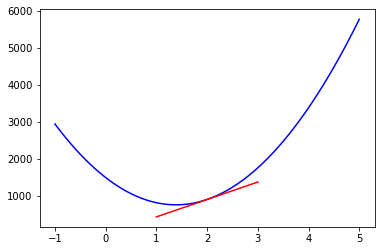

In [5]:
plt.plot(a_range,rss_range(a_range, X, Y),'b')
a_range = np.linspace(a0-1,a0+1,61)
plt.plot(a_range,grad_rss_slope(a_range, a0, X, Y),'r')


plt.show()

Recall, 
The gradient of $RSS(a)$ for any $a$ is defiend as:

$$
\begin{aligned}
\nabla RSS(a) &=-2\sum_{i=1}^{n}(y_i- a x_i)x_i
\end{aligned}
$$

We iteratively approximate $\hat a$ with gradient descent, i.e., starting with an initial guess $a_0$ and a learning rate of $\varepsilon$ we iterate over




$$
\begin{aligned}
a_{k+1} &= a_k - \varepsilon \nabla RSS(a_k) &= a_k + 2 \varepsilon \sum_{i=1}^{n}(y_i- a_k x_i)x_i
\end{aligned}
$$

In [6]:
def grad_desc_rss(K, a0, X, Y, learning_eps,):
    a_s = np.zeros(K+1)
    a_s[0] = a0
    for k in range(1,K+1):
        a_s[k]= a_s[k-1] - learning_eps * grad_rss_point(a_s[k-1],X,Y);
    return a_s




final a value 1.6614316562296807
learning rate 0.0001
iterations 10


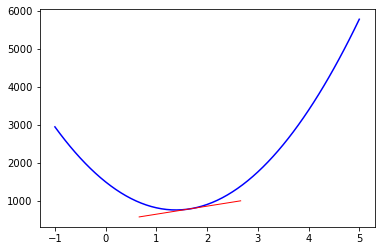

final a value 1.3905566156297327
learning rate 0.0005
iterations 10


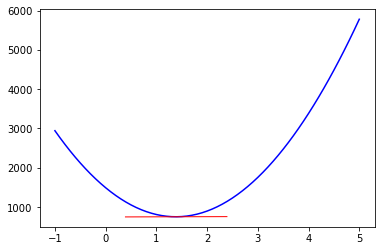

final a value 1.3858028706993146
learning rate 0.001
iterations 10


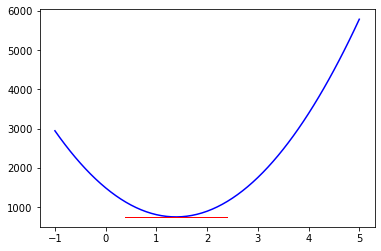

final a value 10.52737534394005
learning rate 0.003
iterations 10


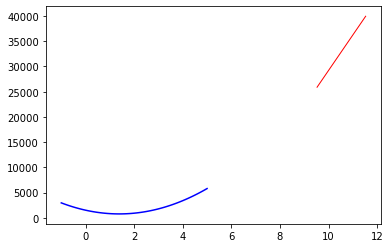

final a value 1.396981360331067
learning rate 0.0001
iterations 50


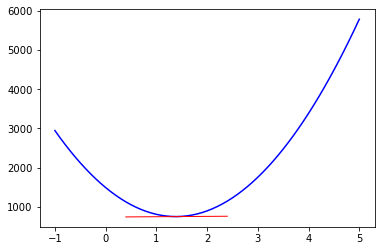

final a value 1.38580261627583
learning rate 0.0005
iterations 50


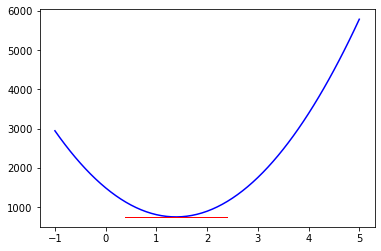

final a value 1.3858026162587667
learning rate 0.001
iterations 50


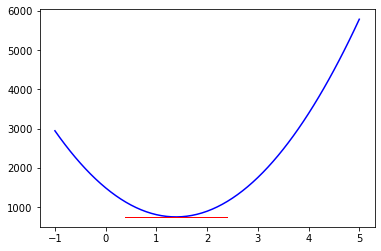

final a value 448615.30561900826
learning rate 0.003
iterations 50


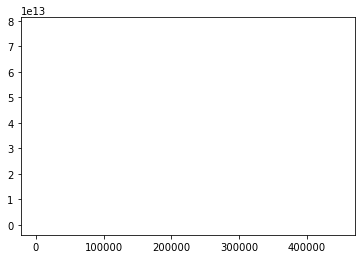

final a value 1.3860060758018096
learning rate 0.0001
iterations 100


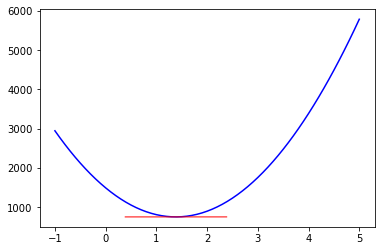

final a value 1.3858026162587669
learning rate 0.0005
iterations 100


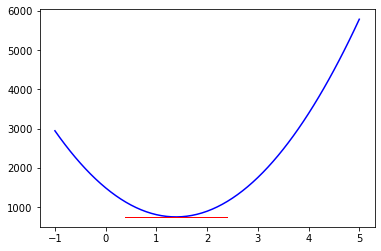

final a value 1.3858026162587667
learning rate 0.001
iterations 100


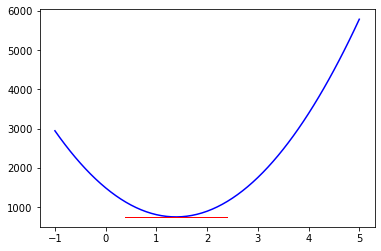

final a value 327670638757.8318
learning rate 0.003
iterations 100


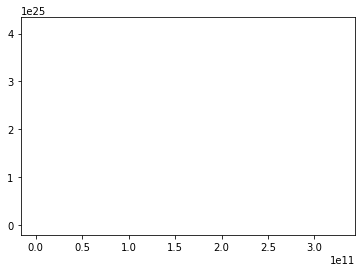

In [7]:
K = [10,50,100] # iterations
learning_eps_list = [0.0001, .0005, 0.001, 0.003]
a_s = []

for k in K:
    for learning_eps in learning_eps_list:
        curr_a_s = grad_desc_rss(k, a0, X, Y, learning_eps)
        a_s.append(curr_a_s)

        # plot the function
        print("final a value",curr_a_s[-1])
        print("learning rate",learning_eps)
        print("iterations",k)
        a_range = np.linspace(a0-3,a0+3,61)
        plt.plot(a_range,rss_range(a_range, X, Y),'b')

        # print all slopes
    #     a_range = np.linspace(a0-1,a0+1,61)
    #     for curr_a_s_point in curr_a_s:
    #         plt.plot(a_range,grad_rss_slope(a_range, curr_a_s_point, X, Y),'r',linewidth=1)

        # print final slope
        a_range = np.linspace(curr_a_s[-1]-1,curr_a_s[-1]+1,61)
        plt.plot(a_range,grad_rss_slope(a_range, curr_a_s[-1], X, Y),'r',linewidth=1)


        plt.show()

*Try different learning rates and interpret the effect. Your answer goes here!*

Here the final result.

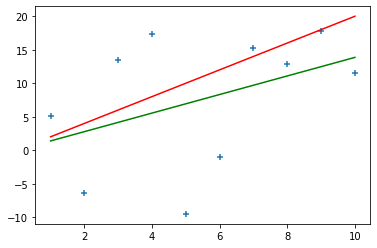

In [8]:
plt.scatter(X,Y,marker="+")
plt.plot(X,a0*X,'r')
plt.plot(X,1.3858026162587667*X, 'g')
plt.show()

## Newton method with one variable

It is obviously difficult to set the learning rate right. To help this, the Newton method adjusts the learning rate $\varepsilon$ in each step to the inverse of the second derivative $h$ of the loss function. In our case it is the inverse of the second derivative of $RSS$.

$$
\begin{aligned}
h(a) &= \frac{\partial^2 RSS(a)}{\partial a^2}\\
&=\frac{\partial (-2 \sum_{i=1}^{n}(y_i- a x_i)x_i)}{\partial a}\\
&=2\sum_{i=1}^{n}x_i^2\\
\end{aligned}
$$

We observe, that $h$ is a constant w.r.t. $a$ and, hence, it does not change during iteration in our quadratic optimization case.

In [9]:
h = 2*np.sum(X**2)
learning_eps = 1/h
print(learning_eps)

0.0012987012987012987


In [10]:
print(grad_desc_rss(1, a0, X, Y, learning_eps))

[2.         1.38580262]


## Gradient descent with two (and more) variables

Let us add an intercept to linear model $Y = aX +b$ still with one feature $X$ and one response $Y$, but with slope $a$ and intercept $b$ to be learned.

We generate data for $Y=2X - 3$ with a random error that is normally distributed proportional to $\mathcal{N}(0,10)$. 

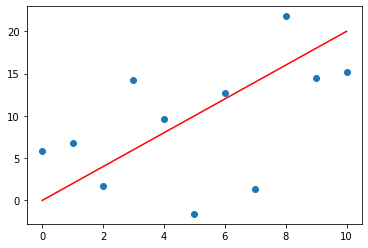

In [11]:
a0 = 2;
b0 = -3;
X = np.arange(0,N+1)
Y = a0*X + b0 + N*random_generator.standard_normal(X.shape)
plt.scatter(X,Y)
plt.plot(X,a0*X,'r')
plt.show()

We learn $\hat a$ and $\hat b$ from the data and expect them to be $\approx 2$ and $\approx -3$, respectively. 
Therefore, we minimize the residual sum of squares $RSS=\sum_{i=1}^{n}(y_i-\hat a x_i - \hat b)^2$.  

Let's define and 3D plot the modified $RSS$ as a function of $a$ and $b$. We chose the ranges of $a$ and $b$ around the (actually unknown) minima of $\approx 2$ and $\approx -3$, respectively. 

In [12]:
# @f2 = @(a, b)(rss2(a,b,X,Y));
# residual sum of squares at a point with two parameters
# a is scalar and is the coefficient of X, b is a scalar and is the intercept (bias), X is vector of x values, Y is vector of corresponding y values, returns scalar
def rss_point2(a, b, X, Y):
    return np.sum( (Y-(a*X)-b)**2)


# residual sum of squares over an interval- which looks like a parabola
# a_range is an array of x coefficients is scalar, X is vector of x values, Y is vector of corresponding y values, returns an array of y values
def rss_range2(aa, bb, X, Y):
    shape = aa.shape
    Z = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            a = aa[i,j]
            b = bb[i,j]
            Z[i,j] = rss_point2(a,b,X,Y)
    return Z

In [40]:
def plot3d(aa, bb, X, Y, real3d):
    Z = rss_range2(aa,bb,X,Y);
    if real3d:
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
        surf = ax.plot_surface(aa, bb, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    else:
        fig, ax = plt.subplots()
        CS = ax.contour(aa, bb, Z)
        ax.clabel(CS, inline=True, fontsize=10)
        ax.set_title('Simplest default with labels')


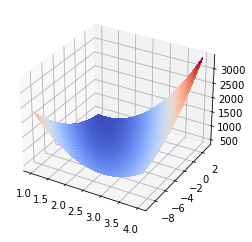

In [41]:
#f2 = @(a, b)(rss2(a,b,X,Y));
a_range = np.linspace(a0-1,a0+2,61)
b_range = np.linspace(b0-6,b0+6,61)
aa, bb = np.meshgrid(a_range,b_range)
plot3d(aa, bb, X, Y, True)

1.0 -9.0


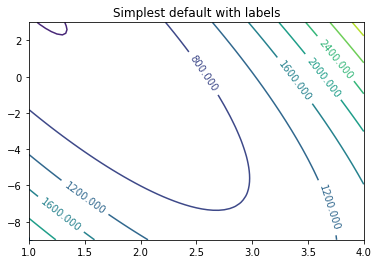

In [42]:
plot3d(aa, bb, X, Y, False)
plt.plot(aa[0,0],bb[0,0],'+')
print(aa[0,0],bb[0,0])
plt.show()

*What can you say about the loss function space? Your answer goes here.* 

The gradient of $RSS(a,b)$ for any $a, b$ is defiend as:

$$
\begin{aligned}
\nabla RSS(a,b) &= \left [ \frac{\partial RSS(a,b)}{\partial a}, \frac{\partial RSS(a,b)}{\partial b}\right ]^T\\
&= \left [ \frac{\partial \sum_{i=1}^{n}(y_i- a x_i-b)^2}{\partial a}, 
           \frac{\partial \sum_{i=1}^{n}(y_i- a x_i-b)^2}{\partial b}\right ]^T \\
&= \left [ \sum_{i=1}^{n}2(y_i- a x_i-b)(-x_i),\sum_{i=1}^{n}2(y_i- a x_i-b)(-1) \right ]^T \\
&= \left [ -2\sum_{i=1}^{n}(y_i- a x_i-b)x_i,-2\sum_{i=1}^{n}(y_i- a x_i-b) \right ]^T \\
&= -2 \left [ \sum_{i=1}^{n}(y_i- a x_i-b)x_i, \sum_{i=1}^{n}(y_i- a x_i-b) \right ]^T 
\end{aligned}
$$

In [55]:
#@ff
def grad_rss2(a,b,X,Y):
    n = len(X)
    grad_a = 0
    grad_b = 0
    tmp = Y - a*X - b
    for i in range(n):
        grad_a = grad_a + tmp[i] * X[i]
        grad_b = grad_b + tmp[i]
    grad_a = -2*grad_a
    grad_b = -2*grad_b
    return [grad_a, grad_b]

In [56]:
def grad_desc_rss2(K, a0, b0, X, Y, learning_eps, verbose):
    as_ = np.zeros(K+1)
    bs = np.zeros(K+1)
    as_[0] = a0
    bs[1] = b0;
    for k in range(K):
        grad_w = grad_rss2(as_[k],bs[k],X,Y)
        grad_a = grad_w[0]
        grad_b = grad_w[1]
        #%learning_eps * [grad_a, grad_b].'
        as_[k+1] = as_[k] - learning_eps * grad_a
        bs[k+1] = bs[k] - learning_eps * grad_b
    return as_,bs
#         if verbose
#             line([as(k),as(k+1)],[bs(k),bs(k+1)])
#             hold on
#     end
#     if verbose
#         alow = min([as.', a0-2]);
#         ahigh = max([as.', a0+2]);
#         blow = min([bs.', b0-9]);
#         bhigh = max([bs.', b0]);
#         [A,B] = meshgrid(alow:0.1:ahigh,blow:0.4:bhigh);
#         plot3d(f, A, B, false) %3D contour
#     end


In [90]:
# f = @(a, b)(rss2(a,b,X,Y));
# ff = @(a,b)(grad_rss2(a,b,X,Y));
K = 10000
learning_eps = 0.001
# learning_eps = 0.0001;
# learning_eps = 0.0025;
as_, bs = grad_desc_rss2(K, a0, b0, X, Y, learning_eps, True)
print(as_[-30:-1])
print(bs[-30:-1])
#print(bs)

[1.04855269 1.04855269 1.04855269 1.04855269 1.04855269 1.04855269
 1.04855269 1.04855269 1.04855269 1.04855269 1.04855269 1.04855269
 1.04855269 1.04855269 1.04855269 1.04855269 1.04855269 1.04855269
 1.04855269 1.04855269 1.04855269 1.04855269 1.04855269 1.04855269
 1.04855269 1.04855269 1.04855269 1.04855269 1.04855269]
[4.04106284 4.04106284 4.04106284 4.04106284 4.04106284 4.04106284
 4.04106284 4.04106284 4.04106284 4.04106284 4.04106284 4.04106284
 4.04106284 4.04106284 4.04106284 4.04106284 4.04106284 4.04106284
 4.04106284 4.04106284 4.04106284 4.04106284 4.04106284 4.04106284
 4.04106284 4.04106284 4.04106284 4.04106284 4.04106284]


*Try different learning rates and interpret the effect. Your answer goes here!*

Here the final result.

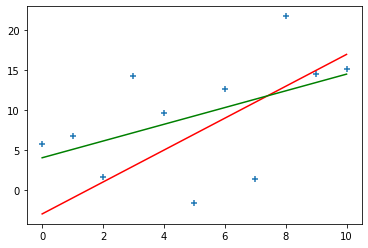

In [98]:

plt.scatter(X,Y,marker="+")
plt.plot(X,a0*X+b0,c="r")
plt.plot(X,as_[K]*X+bs[K],c="g")
plt.show()

## Newton method with two (and more) variables

As in the case for one variable, we observe that $H_{RSS}$ is a constant matrix, i.e., it does not change during the iterations in our quadratic optimization case.

It is still difficult to set the learning rate right. To help this, the Newton method for one variable generalizes:

$$
[a_{k+1}, b_{k+1}] = [a_k,b_k] - H_{RSS}(a_k,b_k)^{-1} \nabla RSS(a_k,b_k) 
$$

where $H_{RSS}$ is the Hessian matrix of $RSS$. 

The Hessian matrix is defined as:
$$
\begin{aligned}
H_{RSS}(a,b) &= 
\begin{bmatrix}
\frac{\partial^2 RSS(a,b)}{\partial a^2} & \frac{\partial^2 RSS(a,b)}{\partial a \partial b} \\
\frac{\partial^2 RSS(a,b)}{\partial b \partial a} & \frac{\partial^2 RSS(a,b)}{\partial b^2} 
\end{bmatrix}\\
&=
\begin{bmatrix}
\frac{\partial (-2\sum_{i=1}^{n}(y_i- a x_i-b)x_i)}{\partial a} & \frac{\partial (-2\sum_{i=1}^{n}(y_i- a x_i-b)x_i)}{\partial b} \\
\frac{\partial (-2\sum_{i=1}^{n}(y_i- a x_i-b)) }{\partial a} & \frac{\partial (-2\sum_{i=1}^{n}(y_i- a x_i-b))}{\partial b} 
\end{bmatrix}\\
&=
\begin{bmatrix}
2\sum_{i=1}^{n}x_i^2 & 2\sum_{i=1}^{n}x_i \\
2\sum_{i=1}^{n}x_i & 2n
\end{bmatrix}\\
&=2
\begin{bmatrix}
\sum_{i=1}^{n}x_i^2 & \sum_{i=1}^{n}x_i \\
\sum_{i=1}^{n}x_i & n
\end{bmatrix}\\
\end{aligned}
$$

In [111]:
H=np.zeros((2,2))
H[0,0]=2*sum(X**2)
H[0,1]=2*sum(X)
H[1,0]=H[0,1]
H[1,1]=2*N
print(H)
H_inv = np.linalg.inv(H)
print(H_inv)

[[770. 110.]
 [110.  20.]]
[[ 0.00606061 -0.03333333]
 [-0.03333333  0.23333333]]


Recall the inverse of a $2\times 2$ matrix $H$: 

$$
\begin{aligned}
H^{-1} &=\frac{1}{h_{11}h_{22}-h_{12}h_{21}}
\begin{bmatrix}
h_{22} & -h_{12} \\
-h_{21} & h_{11} 
\end{bmatrix}\\
\end{aligned}
$$

A learning rate $\varepsilon$ only scales the gradient vector; a Hessian matrix scales and rotates the gradient vector. Check how this concrete Hessian matrix transforms (scales and rotates) a unit vector:

[ 0.01928473 -0.14142136]


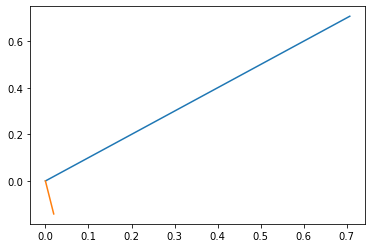

In [125]:
v = np.array([1/np.sqrt(2),1/np.sqrt(2)])
plt.plot([0,v[0]],[0,v[1]])
v2 = -H_inv @ v.T
print(v2)
plt.plot([0,v2[0]],[0,v2[1]])
plt.show()

In [114]:
%%file newton_rss2.m
function ab = newton_rss2(K, a0, b0, H, f, ff, verbose)
    H_inv = inv(H);
    ab = zeros(2,K+1);
    ab(1,1)=a0;
    ab(2,1)=b0;
    for k = 1:K
        grad_w = ff(ab(1,k),ab(2,k));
        grad_a = grad_w(1);
        grad_b = grad_w(2);
        %H_inv * [grad_a, grad_b].'
        ab(:,k+1)= ab(:,k) - H_inv * [grad_a, grad_b].';
        if verbose
            line([ab(1,k),ab(1,k+1)],[ab(2,k),ab(2,k+1)])
            hold on
        end
    end
    if verbose
        alow = min([ab(1,:), a0-2]);
        ahigh = max([ab(1,:), a0+2]);
        blow = min([ab(2,:), b0-9]);
        bhigh = max([ab(2,:), b0+0]);
        [A,B] = meshgrid(alow:0.1:ahigh,blow:0.4:bhigh);
        plot3d(f, A, B, false) %3D contour
    end
end

Overwriting newton_rss2.m


In [ ]:
K=2;
ab_newton = newton_rss2(K, a0, b0, H, f, ff, true)

In [ ]:
rss_0 = f(a0,b0)
rss_opt = f(ab_newton(1,size(ab_newton,2)),ab_newton(2,size(ab_newton,2)))

The Newton method could overshoot the minimum (if the loss function is not convex or due to numerical errors). Therefore, the relaxed or damped Newton's method introduces a damping factor $0<\gamma \leq 1$. Also, we exit when we overshoot the optimum.

In [ ]:
%%file damped_newton_rss2.m
function res = damped_newton_rss2(K, a0, b0, H, gamma, f, ff, verbose)
    H_inv = gamma*inv(H);
    ab = zeros(2,K+1);
    ab(1,1)=a0;
    ab(2,1)=b0;
    for k = 1:K
        grad_w = ff(ab(1,k),ab(2,k));
        grad_a = grad_w(1);
        grad_b = grad_w(2);
        %H_inv * [grad_a, grad_b].'
        ab(:,k+1)= ab(:,k) - H_inv * [grad_a, grad_b].';
        if f(ab(1,k+1),ab(2,k+1)) >= f(ab(1,k),ab(2,k)) 
            k=k-1;
            break
        end
        if verbose
            line([ab(1,k),ab(1,k+1)],[ab(2,k),ab(2,k+1)])
            hold on
        end
    end
    res = ab(:,1:k+1);
    if verbose
        alow = min([ab(1,:), a0-2]);
        ahigh = max([ab(1,:), a0+2]);
        blow = min([ab(2,:), b0-9]);
        bhigh = max([ab(2,:), b0+0]);
        [A,B] = meshgrid(alow:0.1:ahigh,blow:0.4:bhigh);
        plot3d(f, A, B, false) %3D contour
    end
end

In [ ]:
K=100;
gamma=0.1;
ab_newton = damped_newton_rss2(K, a0, b0, H, gamma, f, ff, true)

In [ ]:
rss_0 = f(a0,b0)
rss_opt = f(ab_newton(1,size(ab_newton,2)),ab_newton(2,size(ab_newton,2)))